In [41]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
from sqlalchemy import create_engine, inspect, text

In [43]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produtos = pd.read_csv(url_produto)
url_vendedores = pd.read_csv(url_vendedores)

In [44]:
engine = create_engine('sqlite:///:memory:')

In [45]:
produtos.to_sql('produtos',engine,index=False)

205

In [53]:
itens_pedidos.to_sql('itens_pedidos',engine,index=False)

24527

In [58]:
url_vendedores.to_sql('vendedores', engine, index=False)

5

In [61]:
pedidos.to_sql('pedidos', engine, index=False)

24527

In [46]:
inspetor = inspect(engine)
inspetor.get_table_names()

['produtos']

In [47]:
query = 'SELECT * FROM produtos'

In [48]:
def sql_query(query):
    with engine.connect() as conexao:
        consulta = conexao.execute(text(query))
        retorno = consulta.fetchall()
    return pd.DataFrame(retorno,columns= consulta.keys())

sql_query(query)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248,Usado
...,...,...,...,...,...,...
200,14074,Camisa Amarela Laco,450,Carol Bassi,309858,Usado
201,33349,Vestido Listras Malha,270,Calvin Klein,307118,Usado
202,22568,Casaqueto Estampa Geometrica,245,Zara,244931,Usado
203,40508,Regata Bicolor Alcinha,245,Express,247166,Usado


In [49]:
query = 'SELECT CONDICAO, COUNT() FROM produtos GROUP BY(CONDICAO)'
dados = sql_query(query)
dados

,Condicao,COUNT()
0,Novo com etiqueta,22
1,Novo sem etiqueta,7
2,Usado,176


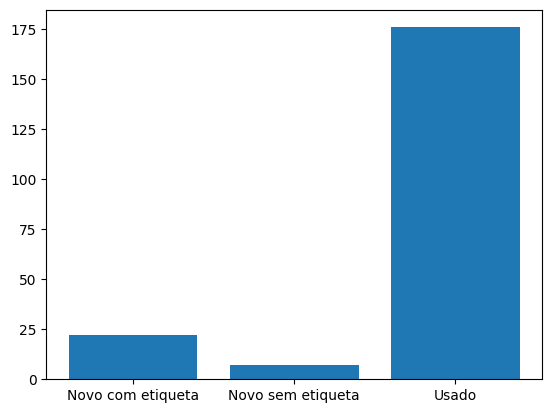

In [50]:
plt.bar(dados['Condicao'],dados['COUNT()'])
plt.show()

In [51]:
produtos.head()
itens_pedidos.head()

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0


In [57]:
query = 'SELECT PRODUTOS.produto_id, PRODUTOS.produto, SUM(ITENS_PEDIDOS.quantidade) as quantidade FROM ITENS_PEDIDOS, PRODUTOS WHERE ITENS_PEDIDOS.produto_id = PRODUTOS.produto_id GROUP BY PRODUTOS.produto ORDER BY quantidade DESC'
sql_query(query)

,produto_id,produto,quantidade
0,15875,Vestido Recortes Cores,795
1,98640,Calca Jeans Costuras,755
2,72667,Saia Pregas Preta,751
3,11218,Calca Alfaiataria Preta,750
4,32126,Saia Midi Cinto,549
...,...,...,...
196,2706,Blusa Cinza,341
197,32986,Blusa Babados Off-white,337
198,88368,Blusa Malha Azul,325
199,84743,Blusa Listrada Malha,322


In [62]:
query = 'SELECT * FROM pedidos'
sql_query(query)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575
...,...,...,...,...,...
24522,63716,64127,1,2021-03-09,2360
24523,63999,37384,2,2021-03-09,2800
24524,64594,100932,1,2021-03-10,19500
24525,64811,3820,3,2021-03-10,417


In [68]:
query = '''SELECT VENDEDOR_ID, COUNT() AS QTD_vendido
FROM PEDIDOS
WHERE strftime('%Y',DATA_COMPRA) = '2020'
GROUP BY VENDEDOR_ID
'''
sql_query(query)


,vendedor_id,QTD_vendido
0,1,3427
1,2,3338
2,3,2782
3,4,2510
4,5,2488


In [69]:
url_vendedores.head()

,vendedor_id,nome_vendedor
0,1,Ana Duarte
1,2,Daniel Siqueira
2,3,Nadia Oliveira
3,4,Millena Pereira
4,5,Paulo Calanca


In [76]:
query = '''SELECT VENDEDORES.nome_vendedor, AVG(PEDIDOS.TOTAL) AS QTD_vendido
FROM PEDIDOS, VENDEDORES
WHERE strftime('%Y',DATA_COMPRA) = '2020'AND VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID
GROUP BY VENDEDORES.nome_vendedor
'''
sql_query(query)

,nome_vendedor,QTD_vendido
0,Ana Duarte,1843.452582
1,Daniel Siqueira,1972.338526
2,Millena Pereira,1894.614343
3,Nadia Oliveira,1818.342200
4,Paulo Calanca,1813.469855
